In [105]:
!pip install wordcloud

import pandas as pd
import numpy as np
import random
import seaborn as sns
import time
import matplotlib.pyplot as plt 
import random
import csv 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import os
os.path
from wordcloud import WordCloud

In [106]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [107]:
train

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305
...,...,...,...,...,...,...,...,...,...
19797,19797,12-18 yrs,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,15to25,2245
19798,19798,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, part time, home base, work fr...","Mumbai, Bengaluru, Chennai, Hyderabad, Dehradu...",0to3,4966
19799,19799,8-13 yrs,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,15to25,4272
19800,19800,1-3 yrs,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,10to15,1793


In [108]:
train.nunique()

Unnamed: 0              19802
experience                129
job_description          9059
job_desig               11708
job_type                    5
key_skills              12951
location                 1504
salary                      6
company_name_encoded     5035
dtype: int64

In [109]:
train.isna().sum()

Unnamed: 0                  0
experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [110]:
train = train.dropna(subset = ["key_skills"])
df_train = train[['key_skills', 'job_desig', 'job_description', 'location', 'job_type', 'experience','salary']]
df_test = test[['key_skills', 'job_desig', 'job_description', 'job_type', 'experience', 'location']]

In [111]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6


In [112]:
import re

def clean_skills(skl):
    skills = str(skl).lower()
    skills = re.sub('\...','',skills)
    skills = re.sub(',','',skills)
    skills = re.sub(r'\s+', ' ', skills)
    return skills

df_train['skills_cleaned'] = df_train['key_skills'].apply(clean_skills)
df_test['skills_cleaned'] = df_test['key_skills'].apply(clean_skills)

<ipython-input-112-075b0db72517>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['skills_cleaned'] = df_train['key_skills'].apply(clean_skills)


In [113]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...


In [114]:
train.job_description.fillna('missing',inplace = True)
test['job_description'].fillna('missing', inplace=True)

def clean_job_desc(job):
    job_desc = str(job).lower()
    job_desc = re.sub(r'[^a-z]', ' ', job_desc)
    job_desc = re.sub(r'\s+', ' ', job_desc)
    return job_desc

df_train['job_desc_cleaned'] = df_train['job_description'].apply(clean_job_desc)
df_test['job_desc_cleaned'] = df_test['job_description'].apply(clean_job_desc)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [115]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...


In [116]:
def clean_location(loc):
    location = loc.lower()
    location = re.sub(r'[^a-z]', ' ', location)
    location = re.sub(r'\s+', ' ', location)
    return location

df_train['loc_cleaned'] = df_train['location'].apply(clean_location)
df_test['loc_cleaned'] = df_test['location'].apply(clean_location)

In [117]:
train['job_type'].fillna('missingjobtype', inplace=True)
train['job_type'].replace('Analytics', 'analytics', inplace=True)
train['job_type'].replace('Analytic', 'analytics', inplace=True)
train['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
train['job_type'].replace('analytic', 'analytics', inplace=True)

test['job_type'].fillna('missingjobtype', inplace=True)
test['job_type'].replace('Analytics', 'analytics', inplace=True)
test['job_type'].replace('Analytic', 'analytics', inplace=True)
test['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
test['job_type'].replace('analytic', 'analytics', inplace=True)

df_train['job_type_cleaned'] = train['job_type'] 
df_test['job_type_cleaned'] = test['job_type']

D:\Softwares\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\Softwares\Anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [118]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype


In [119]:
df_train.isna().sum()

key_skills              0
job_desig               0
job_description      4417
location                0
job_type            15005
experience              0
salary                  0
skills_cleaned          0
job_desc_cleaned        0
loc_cleaned             0
job_type_cleaned        0
dtype: int64

In [120]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype


In [121]:
def min_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(" ")
    exp = int(exp[0])
    return exp
    
def max_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(' ')
    exp = int(exp[1])
    return exp
    
df_train['min_exp'] = df_train['experience'].apply(lambda x : min_exp(x))
df_train['max_exp'] = df_train['experience'].apply(lambda x : max_exp(x))

df_test['min_exp'] = df_test['experience'].apply(lambda x : min_exp(x))
df_test['max_exp'] = df_test['experience'].apply(lambda x : max_exp(x))
        

In [122]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned,min_exp,max_exp
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype,5,7
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype,10,17
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics,5,9
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics,7,10
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype,1,3


In [123]:
def clean_job_desig(desig):
    job_desig = desig.lower()
    job_desig = re.sub(r'[^a-z]', ' ', job_desig)
    job_desig = re.sub(r'\s+', ' ', job_desig)
    return job_desig

df_train['desig_cleaned'] = df_train['job_desig'].apply(clean_job_desig)
df_test['desig_cleaned'] = df_test['job_desig'].apply(clean_job_desig)

In [124]:
df_train['merged'] = (df_train['desig_cleaned'] + ' ' + df_train['job_desc_cleaned'] + ' ' + df_train['skills_cleaned']
                      + ' ' + df_train['job_type_cleaned'])

df_test['merged'] = (df_test['desig_cleaned'] + ' ' + df_test['job_desc_cleaned'] + ' ' + df_test['skills_cleaned']
                     + ' ' + df_test['job_type_cleaned'])

In [125]:
df_train.head()

,key_skills,job_desig,job_description,location,job_type,experience,salary,skills_cleaned,job_desc_cleaned,loc_cleaned,job_type_cleaned,min_exp,max_exp,desig_cleaned,merged
0,"team skills, communication skills, analytical ...",Senior Exploit and Vulnerability Researcher,Exp: Minimum 5 years;Good understanding of IOC...,Delhi NCR(Vikas Puri),NaN,5-7 yrs,6to10,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri,missingjobtype,5,7,senior exploit and vulnerability researcher,senior exploit and vulnerability researcher ex...
1,"ppc, logistics, inventory management, supply c...",Head SCM,He should have handled a team of atleast 5-6 d...,Sonepat,NaN,10-17 yrs,10to15,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,sonepat,missingjobtype,10,17,head scm,head scm he should have handled a team of atle...
2,"HR Analytics, Employee Engagement, Training, S...",Deputy Manager - Talent Management & Leadershi...,Must be an effective communicator (written & s...,Delhi NCR,Analytics,5-9 yrs,15to25,hr analytics employee engagement training succ...,must be an effective communicator written spok...,delhi ncr,analytics,5,9,deputy manager talent management leadership de...,deputy manager talent management leadership de...
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Associate Manager Data Engineering,7 - 10 years of overall experience in data e...,Bengaluru,Analytics,7-10 yrs,10to15,sql javascript automation python ruby analytic...,years of overall experience in data engineeri...,bengaluru,analytics,7,10,associate manager data engineering,associate manager data engineering years of o...
4,"accounting, finance, cash flow, financial plan...",TS- GSA- Senior Analyst,Chartered Accountancy degree or MBA in Finance...,Gurgaon,NaN,1-3 yrs,3to6,accounting finance cash flow financial plannin...,chartered accountancy degree or mba in finance...,gurgaon,missingjobtype,1,3,ts gsa senior analyst,ts gsa senior analyst chartered accountancy de...


In [126]:
data_train  = df_train[['merged', 'loc_cleaned', 'min_exp', 'max_exp']] 
data_test = df_test[['merged', 'loc_cleaned', 'min_exp', 'max_exp']] 

In [127]:
data_train.head()

,merged,loc_cleaned,min_exp,max_exp
0,senior exploit and vulnerability researcher ex...,delhi ncr vikas puri,5,7
1,head scm he should have handled a team of atle...,sonepat,10,17
2,deputy manager talent management leadership de...,delhi ncr,5,9
3,associate manager data engineering years of o...,bengaluru,7,10
4,ts gsa senior analyst chartered accountancy de...,gurgaon,1,3


In [128]:
data_test.head()

,merged,loc_cleaned,min_exp,max_exp
0,it technology senior consultant java j ee seve...,bengaluru,7,12
1,medical billing process international kpo insu...,ahmedabad sola,0,5
2,oracle sales cloud functional consultant shoul...,bengaluru,3,6
3,looking for freshers who want to work with us ...,delhi ncr chennai hyderabad gurgaon lucknow mu...,0,3
4,process associate sr process associate tech as...,hyderabad,0,5


In [129]:
data_train = data_train.rename(columns = {'merged':'emp_info'},inplace = False)

In [130]:
data_test = data_test.rename(columns = {'merged':'emp_info'},inplace = False)

In [131]:
def min_sal(sal):
    val = str(sal).split("to")
    return val[0]
def max_sal(sal):
    val = str(sal).split("to")
    return val[1]

target = pd.DataFrame()
target["min_sal"] = df_train["salary"].apply(lambda x: min_sal(x))
target["max_sal"] = df_train["salary"].apply(lambda x: max_sal(x))
target1 = target.min_sal
target2 = target.max_sal

In [132]:
target.head()

,min_sal,max_sal
0,6,10
1,10,15
2,15,25
3,10,15
4,3,6


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
def get_ax(rows = 1,cols = 2,size = 7):
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return fig,ax

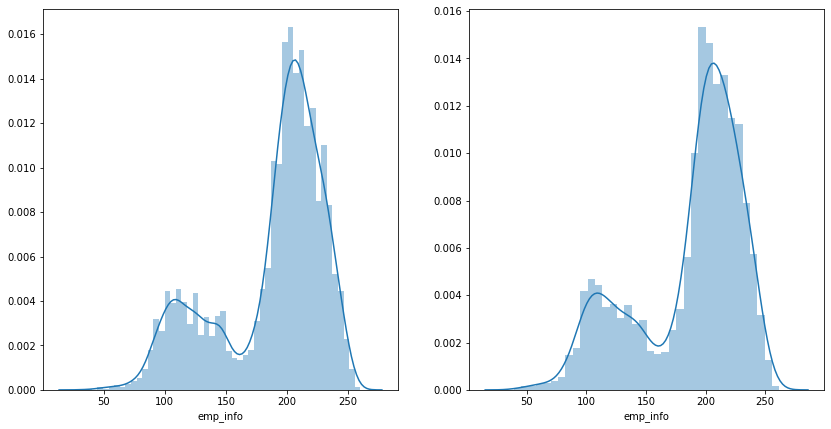

In [135]:
fig,ax = get_ax()
sns.distplot(data_train["emp_info"].str.len(),ax = ax[0])
sns.distplot(data_test["emp_info"].str.len(),ax = ax[1])

In [136]:
data_train.nunique()

emp_info       13687
loc_cleaned     1414
min_exp           22
max_exp           29
dtype: int64

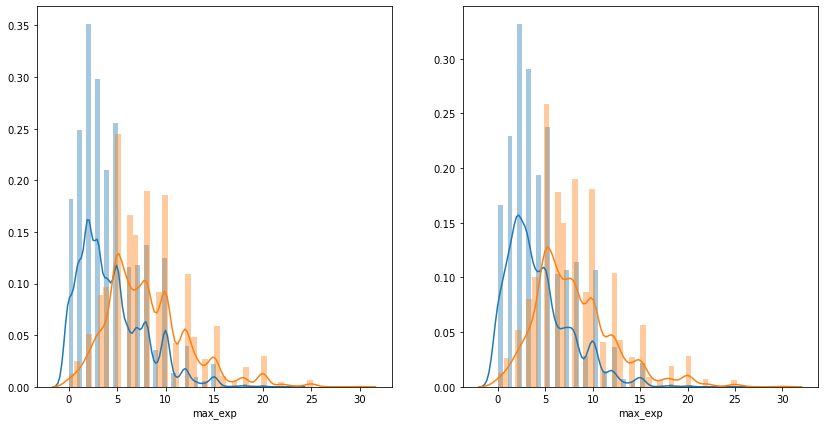

In [137]:
fig,ax = get_ax()

sns.distplot(data_train.min_exp,ax = ax[0])
sns.distplot(data_train.max_exp,ax = ax[0])


sns.distplot(data_test.min_exp,ax = ax[1])
sns.distplot(data_test.max_exp,ax = ax[1])

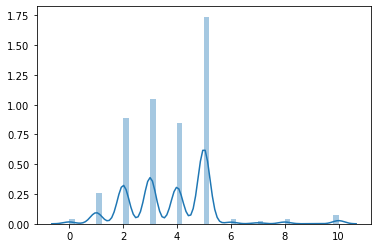

In [138]:
sns.distplot(data_train.max_exp-data_train.min_exp)

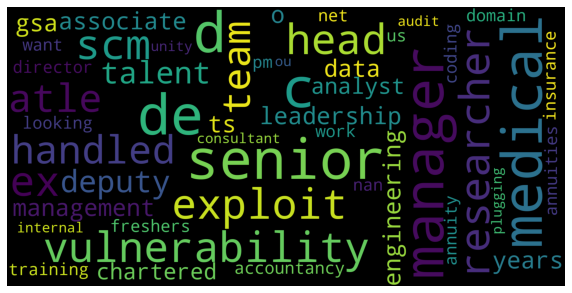

In [139]:
# from wordcloud import WordCloud
def wordcloud(data):
    wordcloud = WordCloud(background_color = 'Black',
                         max_words = 50,
                         max_font_size = 40,
                         scale = 5,
                         random_state = 5).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud(data_train["emp_info"]) 

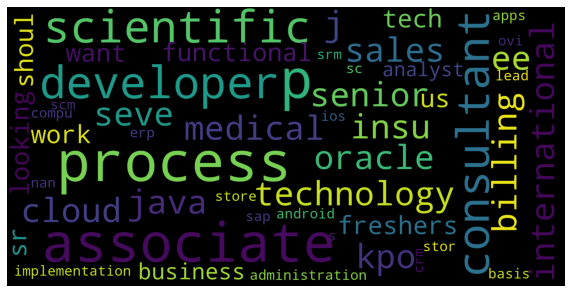

In [141]:
from wordcloud import WordCloud
def wordcloud(data):
    wordcloud = WordCloud(background_color = 'Black',
                         max_words = 50,
                         max_font_size = 40,
                         scale = 5,
                         random_state = 5).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
wordcloud(data_test["emp_info"]) 

In [142]:
data_train.head()

,emp_info,loc_cleaned,min_exp,max_exp
0,senior exploit and vulnerability researcher ex...,delhi ncr vikas puri,5,7
1,head scm he should have handled a team of atle...,sonepat,10,17
2,deputy manager talent management leadership de...,delhi ncr,5,9
3,associate manager data engineering years of o...,bengaluru,7,10
4,ts gsa senior analyst chartered accountancy de...,gurgaon,1,3


In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['salary'] = le.fit_transform(train['salary'])

<ipython-input-144-dc4f66d645ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['salary'] = le.fit_transform(train['salary'])


In [145]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(
    data_train,train['salary'], test_size=0.20, 
    stratify=train['salary'], random_state=75)

In [146]:
print('No. of sample texts X_train: ', len(X_train))
print('No. of sample texts X_cv   : ', len(X_cv))


No. of sample texts X_train:  15840
No. of sample texts X_cv   :  3961


In [147]:
X_train_merged = X_train['emp_info']
X_train_loc = X_train['loc_cleaned']

X_cv_merged = X_cv['emp_info']
X_cv_loc = X_cv['loc_cleaned']

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf1 = TfidfVectorizer(min_df=3, token_pattern=r'\w{3,}', ngram_range=(1,3), max_df=0.9)
tf2 = TfidfVectorizer(min_df=2, token_pattern=r'\w{3,}')

X_train_merged = tf1.fit_transform(X_train_merged)
X_train_loc = tf2.fit_transform(X_train_loc)

X_cv_merged = tf1.transform(X_cv_merged)
X_cv_loc = tf2.transform(X_cv_loc)
# X_cv_merged

In [149]:
from scipy import sparse
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_train_MinExp = sc1.fit_transform(np.array(X_train['min_exp']).reshape(-1,1))
X_cv_MinExp = sc1.transform(np.array(X_cv['min_exp']).reshape(-1,1))
X_train_MinExp = sparse.csr_matrix(X_train_MinExp)
X_cv_MinExp = sparse.csr_matrix(X_cv_MinExp)

sc2 = StandardScaler()
X_train_MaxExp = sc2.fit_transform(np.array(X_train['max_exp']).reshape(-1,1))
X_cv_MaxExp = sc2.transform(np.array(X_cv['max_exp']).reshape(-1,1))
X_train_MaxExp = sparse.csr_matrix(X_train_MaxExp)
X_cv_MaxExp = sparse.csr_matrix(X_cv_MaxExp)

In [150]:
from scipy.sparse import hstack, csr_matrix

merged_train = hstack((X_train_merged, X_train_loc, X_train_MinExp, X_train_MaxExp))
merged_cv  = hstack((X_cv_merged, X_cv_loc, X_cv_MinExp, X_cv_MaxExp))

In [151]:
merged_train.shape, merged_cv.shape

((15840, 52320), (3961, 52320))

In [152]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [154]:
!pip install lightgbm
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label=y_cv)

In [155]:
param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.04,  
         'num_leaves': 23,
         'max_depth': 7, 
         'min_data_in_leaf': 28, 
         'max_bin': 10, 
         'min_data_in_bin': 3,   
         'num_class': 6,
         'metric': 'multi_logloss'
         }

In [156]:
lgbm = lgb.train(params=param,
                 train_set=train_data,
                 num_boost_round=100,
                 valid_sets=[test_data])

y_pred_class = lgbm.predict(merged_cv)

D:\Softwares\Anaconda\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29632
[LightGBM] [Info] Number of data points in the train set: 15840, number of used features: 3005
[LightGBM] [Info] Start training from score -1.808567
[LightGBM] [Info] Start training from score -1.481605
[LightGBM] [Info] Start training from score -1.568616
[LightGBM] [Info] Start training from score -2.531427
[LightGBM] [Info] Start training from score -1.947616
[LightGBM] [Info] Start training from score -1.724030
[1]	valid_0's multi_logloss: 1.70572
[2]	valid_0's multi_logloss: 1.67071
[3]	valid_0's multi_logloss: 1.63985
[4]	valid_0's multi_logloss: 1.61233
[5]	valid_0's multi_logloss: 1.58766
[6]	valid_0's multi_logloss: 1.56483
[7]	valid_0's multi_logloss: 1.54427
[8]	valid_0's multi_logloss: 1.52547
[9]	valid_0's multi_l

D:\Softwares\Anaconda\lib\site-packages\lightgbm\basic.py:597: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [157]:
X_train_merged = data_train['emp_info']
X_train_loc = data_train['loc_cleaned']

X_test_merged = data_test['emp_info']
X_test_loc = data_test['loc_cleaned']

y_train = train['salary']

In [158]:
tf1 = TfidfVectorizer(min_df=3, token_pattern=r'\w{3,}', ngram_range=(1,3))
tf2 = TfidfVectorizer(min_df=2, token_pattern=r'\w{3,}')

X_train_merged = tf1.fit_transform(X_train_merged)
X_train_loc = tf2.fit_transform(X_train_loc)

X_test_merged = tf1.transform(X_test_merged)
X_test_loc = tf2.transform(X_test_loc)

In [159]:
from scipy import sparse
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_train_MinExp = sc1.fit_transform(np.array(df_train['min_exp']).reshape(-1,1))
X_test_MinExp = sc1.transform(np.array(df_test['min_exp']).reshape(-1,1))
X_train_MinExp = sparse.csr_matrix(X_train_MinExp)
X_test_MinExp = sparse.csr_matrix(X_test_MinExp)

sc2 = StandardScaler()
X_train_MaxExp = sc2.fit_transform(np.array(df_train['max_exp']).reshape(-1,1))
X_test_MaxExp = sc2.transform(np.array(df_test['max_exp']).reshape(-1,1))
X_train_MaxExp = sparse.csr_matrix(X_train_MaxExp)
X_test_MaxExp = sparse.csr_matrix(X_test_MaxExp)

In [160]:
merged_train = hstack((X_train_merged, X_train_loc, X_train_MinExp, X_train_MaxExp))
merged_test  = hstack((X_test_merged, X_test_loc, X_test_MinExp, X_test_MaxExp))

In [161]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)

param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.04, 
         'num_leaves': 23,
         'max_depth': 7, 
         'min_data_in_leaf': 28, 
         'max_bin': 10, 
         'min_data_in_bin': 3,   
         'num_class': 6,
         'metric': 'multi_logloss'
         }

lgbm = lgb.train(params=param, 
                 train_set=train_data)

predictions = lgbm.predict(merged_test)

y_pred_class = []
for x in predictions:
    y_pred_class.append(np.argmax(x))

y_pred_class = le.inverse_transform(y_pred_class)

D:\Softwares\Anaconda\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37834
[LightGBM] [Info] Number of data points in the train set: 19801, number of used features: 3848
[LightGBM] [Info] Start training from score -1.808617
[LightGBM] [Info] Start training from score -1.481655
[LightGBM] [Info] Start training from score -1.568666
[LightGBM] [Info] Start training from score -2.531477
[LightGBM] [Info] Start training from score -1.947578
[LightGBM] [Info] Start training from score -1.723868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

D:\Softwares\Anaconda\lib\site-packages\lightgbm\basic.py:597: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [162]:
df_sub = pd.DataFrame(data=y_pred_class, columns=['salary'])

In [163]:
df_sub

,salary
0,10to15
1,0to3
2,6to10
3,0to3
4,0to3
...,...
6596,10to15
6597,6to10
6598,15to25
6599,15to25


In [164]:
df_sub.to_csv("sub.csv",index = False)

In [165]:
def min_sal(sal):
    val = str(sal).split("to")
    return val[0]
def max_sal(sal):
    val = str(sal).split("to")
    return val[1]

minsal = df_sub["salary"].apply(lambda x: min_sal(x))
max_sal = df_sub["salary"].apply(lambda x: max_sal(x))

In [169]:
X = pd.DataFrame({"min_sal":minsal,
                  "max_sal":max_sal})

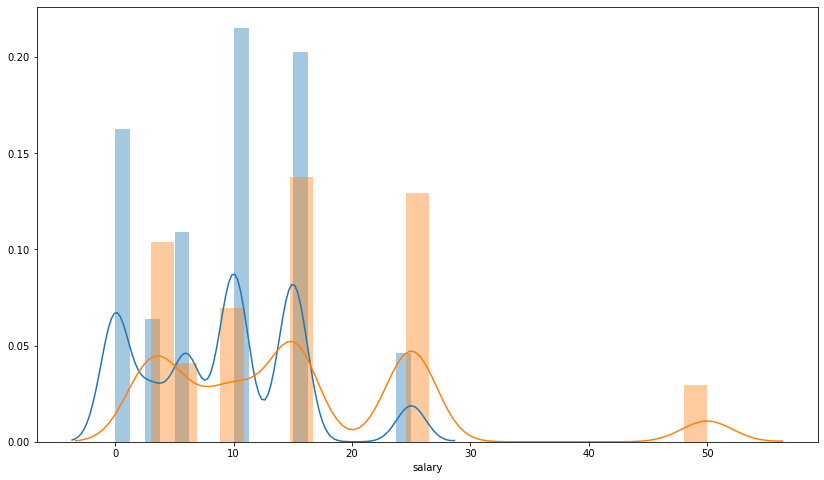

In [171]:
fig,ax = plt.subplots(1,1 ,figsize = (14,8))
sns.distplot(minsal)
sns.distplot(max_sal)

In [168]:
test1 = pd.read_csv("test.csv")

In [172]:
final = pd.concat([test1,X],axis=1)

In [173]:
final.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_sal,max_sal
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,10,15
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,3
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,6,10
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0,3


In [174]:
def min_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(" ")
    exp = int(exp[0])
    return exp
    
def max_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(' ')
    exp = int(exp[1])
    return exp
    
final['min_exp'] = final['experience'].apply(lambda x : min_exp(x))
final['max_exp'] = final['experience'].apply(lambda x : max_exp(x))

In [175]:
final.head()

,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_sal,max_sal,min_exp,max_exp
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,10,15,7,12
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,3,0,5
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,6,10,3,6
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3,0,3
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0,3,0,5


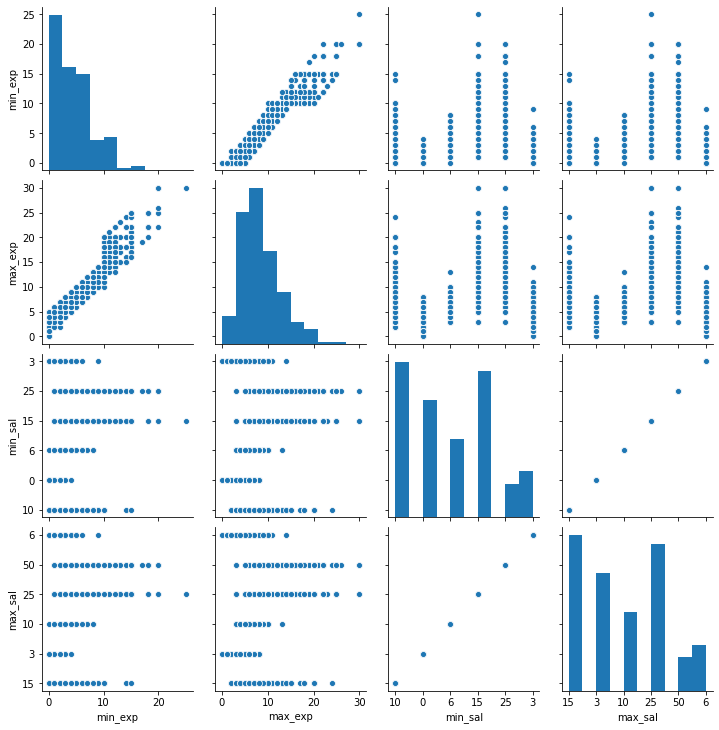

In [176]:
labels = ["min_exp","max_exp","min_sal","max_sal"]
sns.pairplot(final[labels])

In [177]:
# def min_exp(val):
#     exp = re.sub('-',' ',val)
#     exp = exp.split(" ")
#     exp = int(exp[0])
#     return exp
    
# def max_exp(val):
#     exp = re.sub('-',' ',val)
#     exp = exp.split(' ')
#     exp = int(exp[1])
#     return exp
col = final.loc[: , "min_sal":"max_sal"]
final['salary_mean'] = col.mean(axis=1)

cols = final.loc[: , "min_exp":"max_exp"]
final['exp_mean'] = cols.mean(axis=1)

In [180]:
final


,experience,job_description,job_desig,job_type,key_skills,location,company_name_encoded,min_sal,max_sal,min_exp,max_exp,salary_mean,exp_mean
0,7-12 yrs,Professional experience in Java/J2EE based ser...,IT Technology Senior Consultant/java/ J2ee/ Se...,NaN,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,10,15,7,12,507.5,9.5
1,0-5 yrs,We are looking for 20+ Fresher/Experienced Can...,Medical Billing Process | International KPO | ...,NaN,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,3,0,5,1.5,2.5
2,3-6 yrs,Should understand overall integration framewor...,Oracle Sales Cloud Functional Consultant,NaN,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,6,10,3,6,305.0,4.5
3,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3,0,3,1.5,1.5
4,0-5 yrs,NaN,Process Associate / Sr Process Associate / Tec...,NaN,"voice support, analytical skills, Process asso...",Hyderabad,40,0,3,0,5,1.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,4-7 yrs,2-9 years experience in full Implementation Li...,Business Analyst - Implementation (p2p/s2p/erp...,NaN,"UAT, Procurement, Case Studies, Life Cycle, Bu...",Mumbai,2692,10,15,4,7,507.5,5.5
6597,1-5 yrs,NaN,SAP Basis Administration,NaN,"CRM, SCM, SRM, Computer science, Business proc...",Gurgaon,104,6,10,1,5,305.0,3.0
6598,5-10 yrs,- 5- 11yrs of experience in the below skills;-...,Apps Store Developer & Lead - Android/ios/ovi ...,NaN,"android, ios, communication skills, Apps Store...",Mumbai,2025,15,25,5,10,762.5,7.5
6599,7-12 yrs,stimuli articles) or in peer- reviewed journal...,Associate Scientific Liasion / Scientific Liasion,NaN,"Biochemistry, Chromatography, Spectroscopy, An...",Hyderabad,2512,15,25,7,12,762.5,9.5


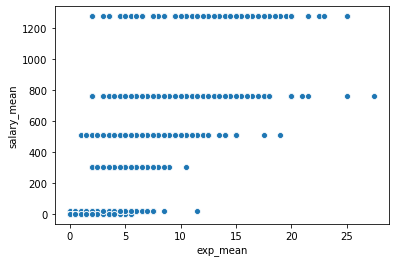

In [179]:
sns.scatterplot(x = final["exp_mean"],y = final["salary_mean"])